# Section A: Theory-Based Questions
#### Q1. Why do we need to convert text data into numerical format before using it in a machine learning model?
We need to convert text data into numerical format before using it in a machine learning model because:

**1. ML models work with numbers, not raw text**: Machine learning algorithms use mathematical operations like distance calculation, matrix multiplication, and gradient descent — which require numeric input.

**2. Text is unstructured, while ML needs structured input** : Raw text (like "I love this movie") has no inherent numeric meaning. We need to convert it into structured numerical representations (like vectors or embeddings) that the model can learn from.

**3. Numeric format captures meaning or frequency** 
- Common methods:
    - Bag of Words (BoW) – counts word occurrences.
    - TF-IDF – weighs important words.
    - Word Embeddings (Word2Vec, GloVe) – capture context and meaning.

**4. Models learn patterns from numbers**: Once the text is transformed into vectors (e.g., [0.1, 0.3, -0.2, ...]), models can identify patterns, similarities, or sentiment.

**Example:**

Original: "I hate this product"
- Tokenize → ['I', 'hate', 'this', 'product']
- Vectorize → [0.2, -0.8, 0.5, 0.1] (using embedding)
- Model learns this vector indicates negative sentiment.

#### Q2. What is the Bag of Words model? How does it represent text?
BoW represents a piece of text as a "bag" (collection) of its words, ignoring grammar and word order, but keeping track of word frequency.

**How does BoW work?**
- Build a vocabulary of all unique words from the entire text corpus.
- For each document/sentence, count how many times each word appears.
- Represent each document as a vector of word counts.

**Key Points:**
- Order doesn’t matter (it’s a "bag", not a sequence).
- Simple and fast, but doesn't capture meaning or context.
- Works well for basic models like Naive Bayes or Logistic Regression.

**Limitations:**
- Can create very large and sparse vectors.
- Cannot understand synonyms, negations, or word context.
    - E.g., “I like this” vs. “I don’t like this” may look too similar.

#### Q3. What is TF-IDF, and how does it differ from the Bag of Words model?
TF-IDF stands for:
- TF – Term Frequency
- IDF – Inverse Document Frequency
  
It is a numerical statistic that reflects how important a word is in a document relative to a collection of documents (corpus).

TF-IDF Formula: TF-IDF(t,d)=TF(t,d)×IDF(t)

Where:
- TF(t, d) = frequency of term t in document d
- IDF(t) = log(N / df(t)), where
- N = total number of documents
- df(t) = number of documents containing the term t

**How is TF-IDF different from Bag of Words?**
| Feature             | Bag of Words         | TF-IDF                         |
| ------------------- | -------------------- | ------------------------------ |
| Representation      | Raw word counts      | Weighted importance (TF × IDF) |
| Common words        | Treated equally      | Downweighted                   |
| Rare words          | No special treatment | Upweighted (more important)    |
| Captures importance | No                 | Yes                          |
| Output              | Sparse vectors       | Sparse, weighted vectors       |

#### Q4. Explain one real-world limitation of Bag of Words and one strength of TF-IDF in handling large text corpora.

**Limitation of Bag of Words (BoW):**
- BoW ignores word importance and context, which leads to inefficient or misleading representations in large corpora.
- **Real-world example:**
    - In a huge collection of product reviews, common words like "the", "product", or "good" appear in almost every review. BoW assigns them high importance just because they appear frequently — even though they don’t carry much unique meaning.
- **Result:** BoW fails to distinguish between meaningful and meaningless content, especially in large datasets.

**Strength of TF-IDF:**
- TF-IDF highlights rare, informative words and downplays common, less meaningful ones.
- **Real-world example:**
    - In thousands of news articles, the word "earthquake" in a few documents is much more meaningful than common words like "the" or "is".
TF-IDF gives higher weight to "earthquake" and lower weight to common words — improving search relevance, keyword extraction, and text classification.
- **Result:** TF-IDF is more efficient and meaningful for large text corpora.

# Section B: Practical-Based Questions

#### Q5. Load the dataset into a pandas DataFrame. Check for null values, unique labels, and basic statistics.
- import pandas as pd
- df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']] df.columns = ['label', 'message']

In [28]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [10]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Hasti
[nltk_data]     Gohel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Hasti
[nltk_data]     Gohel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']] 
df.columns = ['label', 'message']
df.head()
print("Null values in each column:\n", df.isnull().sum())
print("Unique labels:", df['label'].unique())
print("Label counts:\n", df['label'].value_counts())
print("Dataset shape:", df.shape)
print("Message length stats:")
df['message_length'] = df['message'].apply(len)
print(df['message_length'].describe())


Null values in each column:
 label      0
message    0
dtype: int64
Unique labels: ['ham' 'spam']
Label counts:
 label
ham     4825
spam     747
Name: count, dtype: int64
Dataset shape: (5572, 2)
Message length stats:
count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: message_length, dtype: float64


#### Q6. Perform text preprocessing on the message column:
- Lowercase the text
- Remove punctuation
- Remove stopwords
- Apply tokenization (you may use NLTK 

In [12]:
def preprocess_text(text):
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    
    return cleaned_tokens
    
df['cleaned_tokens'] = df['message'].apply(preprocess_text)
print(df[['message', 'cleaned_tokens']].head())

                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                      cleaned_tokens  
0  [go, jurong, point, crazy, available, bugis, n...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...  
3      [u, dun, say, early, hor, u, c, already, say]  
4  [nah, dont, think, goes, usf, lives, around, t...  


#### Q7. Convert the preprocessed messages into a Bag of Words matrix using CountVectorizer.
- Print the shape of the resulting matrix
- Display the vocabulary

In [17]:
df['cleaned_text'] = df['cleaned_tokens'].apply(lambda tokens: ' '.join(tokens))
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['cleaned_text'])
print("Shape of BoW matrix:", X_bow.shape)

#print("Vocabulary:\n", vectorizer.vocabulary_)
print("First 20 vocabulary items:\n", list(vectorizer.vocabulary_.items())[:20])


Shape of BoW matrix: (5572, 9372)
First 20 vocabulary items:
 [('go', 3763), ('jurong', 4649), ('point', 6378), ('crazy', 2481), ('available', 1401), ('bugis', 1864), ('great', 3858), ('world', 9103), ('la', 4806), ('buffet', 1862), ('cine', 2197), ('got', 3819), ('amore', 1168), ('wat', 8867), ('ok', 5943), ('lar', 4845), ('joking', 4617), ('wif', 8999), ('oni', 5975), ('free', 3555)]


#### Q8. Convert the messages into a TF-IDF matrix using TfidfVectorizer.
- Display the first 5 rows of the matrix as a pandas DataFrame

In [19]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
print(tfidf_df.head())

   008704050406  0089my  0121  01223585236  01223585334  0125698789   02  \
0           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
1           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
2           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
3           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
4           0.0     0.0   0.0          0.0          0.0         0.0  0.0   

   020603  0207  02070836089  ...   ìï  ìïll  ûthanks  ûªm  ûªt  ûªve   ûï  \
0     0.0   0.0          0.0  ...  0.0   0.0      0.0  0.0  0.0   0.0  0.0   
1     0.0   0.0          0.0  ...  0.0   0.0      0.0  0.0  0.0   0.0  0.0   
2     0.0   0.0          0.0  ...  0.0   0.0      0.0  0.0  0.0   0.0  0.0   
3     0.0   0.0          0.0  ...  0.0   0.0      0.0  0.0  0.0   0.0  0.0   
4     0.0   0.0          0.0  ...  0.0   0.0      0.0  0.0  0.0   0.0  0.0   

   ûïharry   ûò  ûówell  
0      0.0  0.0     0.0  
1      0.0  0.0     0.

#### Q9. Compare the frequency and TF-IDF score of three common words (e.g., “free”, “win”, “call”).
- Which model gives more importance to rare but meaningful words?

**Interpretation:**
- BoW counts raw frequency: "call" may appear most, but could be common across many messages (not necessarily spam).
- TF-IDF gives more importance to rarer but more spammy words like "free" and "win".

In [20]:
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

print("BoW Frequency:")
print("free:", bow_df['free'].sum())
print("win :", bow_df['win'].sum())
print("call:", bow_df['call'].sum())

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Total Scores:")
print("free:", tfidf_df['free'].sum())
print("win :", tfidf_df['win'].sum())
print("call:", tfidf_df['call'].sum())


BoW Frequency:
free: 275
win : 71
call: 576

TF-IDF Total Scores:
free: 47.133596364683605
win : 14.067937226258003
call: 105.03648293992977


#### Q10. Build a simple spam classification model using TF-IDF vectors and Logistic Regression or Naive Bayes.
- Split the data into train/test sets
- Train the model and report the accuracy, precision, and recall

In [25]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['message'])  # No need to tokenize manually
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")

Accuracy : 0.9686
Precision: 1.0000
Recall   : 0.7667


#### Q11. Create a confusion matrix to visualize true positives, true negatives, false positives, and false negatives. Comment on model performance.

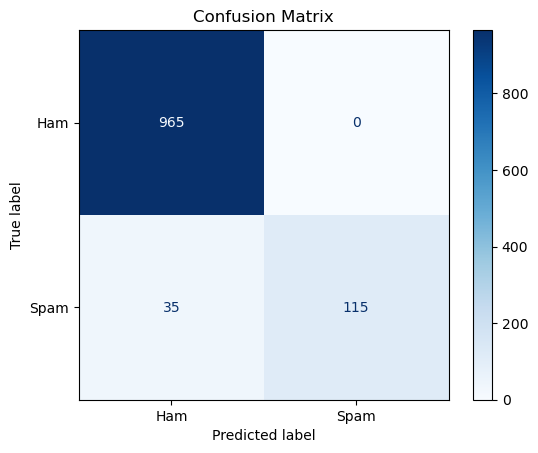

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # 0 = ham, 1 = spam
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#### Q12. Plot the top 10 TF-IDF features that are most indicative of a spam message (i.e., highest average TF-IDF score in spam class).

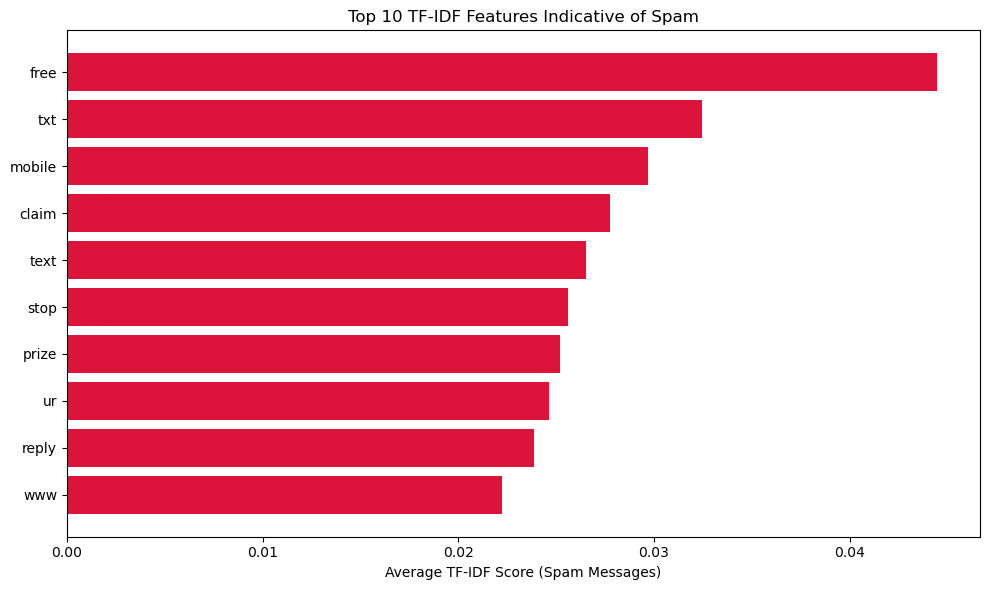

In [29]:
feature_names = tfidf.get_feature_names_out()

X_tfidf_array = X.toarray()

spam_indices = df[df['label'] == 1].index
spam_tfidf = X_tfidf_array[spam_indices]

spam_avg_tfidf = np.mean(spam_tfidf, axis=0)

top_n = 10
top_indices = np.argsort(spam_avg_tfidf)[-top_n:][::-1]

top_features = [feature_names[i] for i in top_indices]
top_scores = [spam_avg_tfidf[i] for i in top_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_scores[::-1], color='crimson')
plt.xlabel("Average TF-IDF Score (Spam Messages)")
plt.title("Top 10 TF-IDF Features Indicative of Spam")
plt.tight_layout()
plt.show()
